<a href="https://colab.research.google.com/github/arielwendichansky/DI_Bootcamp/blob/main/MeNow/Data_Analytics_Ariel_Wendichansky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

# Features Explanation

The dataset provided include the following data:

* **COSING Ref No**: This is a unique reference number assigned by the European Commission's Cosmetic Ingredients Database (COSING) for identifying cosmetic ingredients.

* **INCI name**: The International Nomenclature of Cosmetic Ingredients (INCI) name, which is a standardized name for ingredients used in cosmetics and personal care products.

* **INN name**: The International Nonproprietary Name (INN) given to pharmaceutical substances or active pharmaceutical ingredients, issued by the World Health Organization (WHO).

* **Ph. Eur. Name**: The name as it appears in the European Pharmacopoeia, a reference work for the quality control of medicines in Europe.

* **CAS No**: The Chemical Abstracts Service (CAS) number, a unique numerical identifier assigned to every chemical substance described in the open scientific literature.

* **EC No**: The European Community number, also known as the EINECS (European Inventory of Existing Commercial Chemical Substances) number, assigned to substances for regulatory purposes within the EU.

* **Chem/IUPAC Name / Description**: The chemical name or the International Union of Pure and Applied Chemistry (IUPAC) name, which provides a standardized way to name chemical substances based on their structure. A description is also provided.

* **Restriction**: Any restrictions on the use of the ingredient in cosmetic products, which could include maximum allowable concentrations, specific product types, or other regulatory limits.

* **Function**: The role or purpose of the ingredient in a cosmetic formulation, such as an emulsifier, preservative, fragrance, etc.

* **Update Date**: The date on which the information for that specific ingredient was last updated in the database.

# Data Explration Analysis (DEA)

In [95]:
# Display the first few rows

df = pd.read_csv('COSING_Ingredients-Fragrance Inventory_v2 .csv')
df.head()

,COSING Ref No,INCI name,INN name,Ph. Eur. Name,CAS No,EC No,Chem/IUPAC Name / Description,Restriction,Function,Update Date
0,94753,DISODIUM TETRAMETHYLHEXADECENYLCYSTEINE FORMYL...,NaN,NaN,"2040469-40-5, 2422121-34-2",NaN,Disodium Tetramethylhexadecenylcysteine Formyl...,NaN,SKIN PROTECTING,16/06/2020
1,99268,(ANGELICA ACUTILOBA/PAEONIA LACTIFLORA) ROOT/C...,NaN,NaN,NaN,NaN,(Angelica Acutiloba/Paeonia Lactiflora) Root/C...,NaN,SKIN CONDITIONING - EMOLLIENT,19/03/2021
2,99270,(ARCTIUM LAPPA/RAPHANUS SATIVUS/MALVA VERTICIL...,NaN,NaN,NaN,NaN,(Arctium Lappa/Raphanus Sativus/Malva Verticil...,NaN,SKIN CONDITIONING - EMOLLIENT,19/03/2021
3,94896,(LIQUIDAMBAR STYRACIFLUA/TRIBULUS TERRESTRIS) ...,NaN,NaN,NaN,NaN,(Liquidambar Styraciflua/Tribulus Terrestris)...,NaN,SKIN CONDITIONING,01/12/2017
4,95645,ACRYLATES/VA/VINYL NEODECANOATE COPOLYMER,NaN,NaN,99728-55-9,NaN,Acrylates/VA/Vinyl Neodecanoate Copolymer is ...,NaN,PLASTICISER,14/02/2018


In [96]:
# Display the columns in the dataset

df.columns

Index(['COSING Ref No', 'INCI name', 'INN name', 'Ph. Eur. Name', 'CAS No',
       'EC No', 'Chem/IUPAC Name / Description', 'Restriction', 'Function',
       'Update Date'],
      dtype='object')

In [97]:
# Display the Shape, data types and not null values for every feature in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30070 entries, 0 to 30069
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   COSING Ref No                  30070 non-null  int64 
 1   INCI name                      30070 non-null  object
 2   INN name                       519 non-null    object
 3   Ph. Eur. Name                  183 non-null    object
 4   CAS No                         18473 non-null  object
 5   EC No                          15127 non-null  object
 6   Chem/IUPAC Name / Description  29593 non-null  object
 7   Restriction                    1948 non-null   object
 8   Function                       29853 non-null  object
 9   Update Date                    30070 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.3+ MB


In [98]:
# Replacing 'not reported' values in 'Function' column to NULL values

df['Function'] = df['Function'].replace('NOT REPORTED', np.nan)

In [99]:
# Change update date to datetime type

df ['Update Date'] = pd.to_datetime(df['Update Date'], format='%d/%m/%Y')

In [100]:
# Display percentage of missing values for every feature

total_rows = df.shape[0]

for col in df.columns:
  missing_values = df[col].isnull().sum()
  missing_percentage = (missing_values / total_rows) * 100
  print(f'The percentage of missing values for {col} is {missing_percentage:.2f}%')

The percentage of missing values for COSING Ref No is 0.00%
The percentage of missing values for INCI name is 0.00%
The percentage of missing values for INN name is 98.27%
The percentage of missing values for Ph. Eur. Name is 99.39%
The percentage of missing values for CAS No is 38.57%
The percentage of missing values for EC No is 49.69%
The percentage of missing values for Chem/IUPAC Name / Description is 1.59%
The percentage of missing values for Restriction is 93.52%
The percentage of missing values for Function is 2.57%
The percentage of missing values for Update Date is 0.00%


There are features like 'INN name' and 'Ph. Eur. Name' where the percentage of missing values is high, a reason for this can be that it does not have a different name for the EU or this was not loaded.
Furthermore, the 'Restriction' column also has a high percentage of null values, the reason for this could be that many cosmetics does not have any restriction.

In [101]:
# Display unique values for every feature in the dataset

for col in df.columns:
  unique_values = df[col].unique()
  total_values = df[col].notnull().sum()
  print(f'There are {len(unique_values)} unique values for the column', col,f'.The percentage of unique values is %{round((len(unique_values)/total_values)*100,2)}')


There are 30070 unique values for the column COSING Ref No .The percentage of unique values is %100.0
There are 30062 unique values for the column INCI name .The percentage of unique values is %99.97
There are 488 unique values for the column INN name .The percentage of unique values is %94.03
There are 183 unique values for the column Ph. Eur. Name .The percentage of unique values is %100.0
There are 10640 unique values for the column CAS No .The percentage of unique values is %57.6
There are 7147 unique values for the column EC No .The percentage of unique values is %47.25
There are 29291 unique values for the column Chem/IUPAC Name / Description .The percentage of unique values is %98.98
There are 870 unique values for the column Restriction .The percentage of unique values is %44.66
There are 2504 unique values for the column Function .The percentage of unique values is %8.55
There are 701 unique values for the column Update Date .The percentage of unique values is %2.33


The 'Function' table has a low percentage of unique values, one of the reasons for this could be that the function for many of the products in the dataset are used for the same purpose.

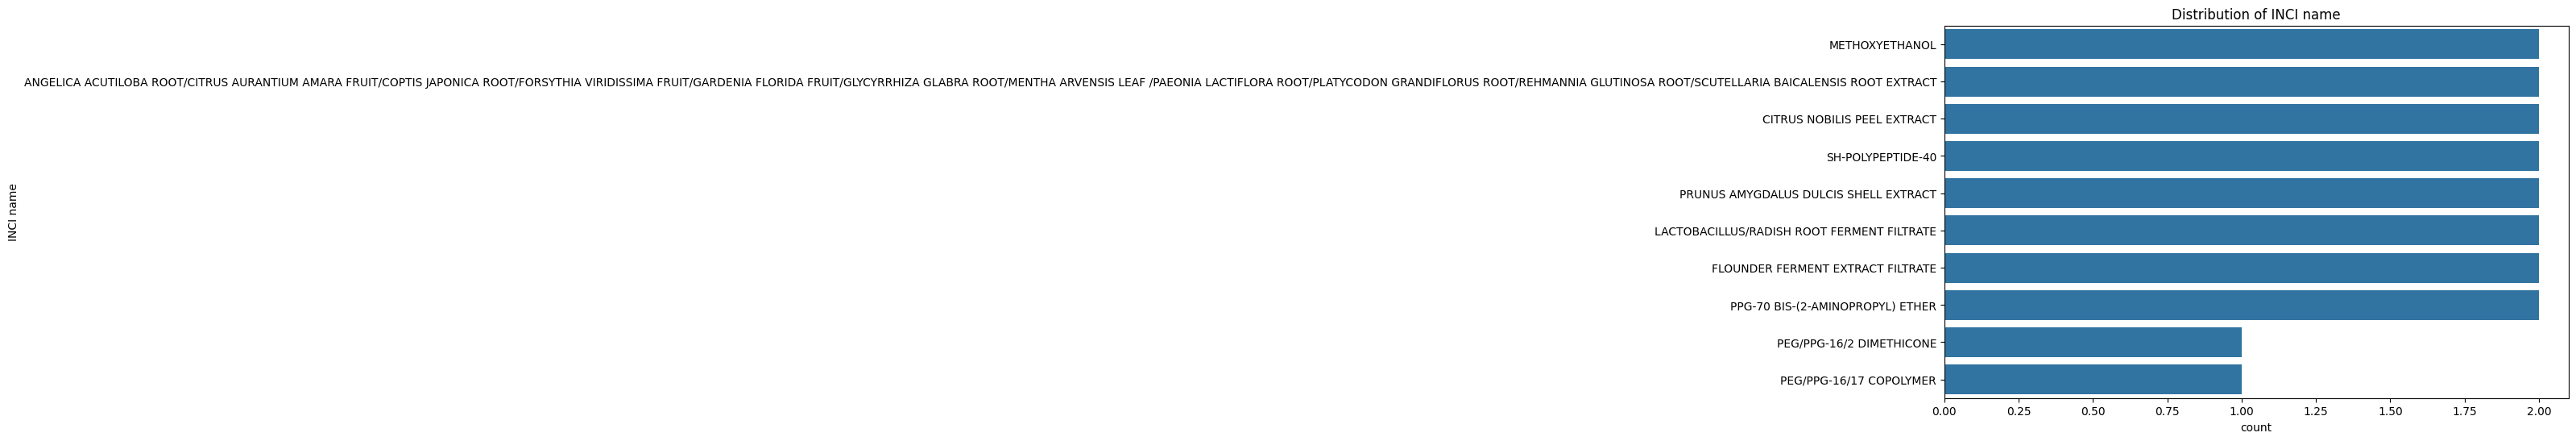

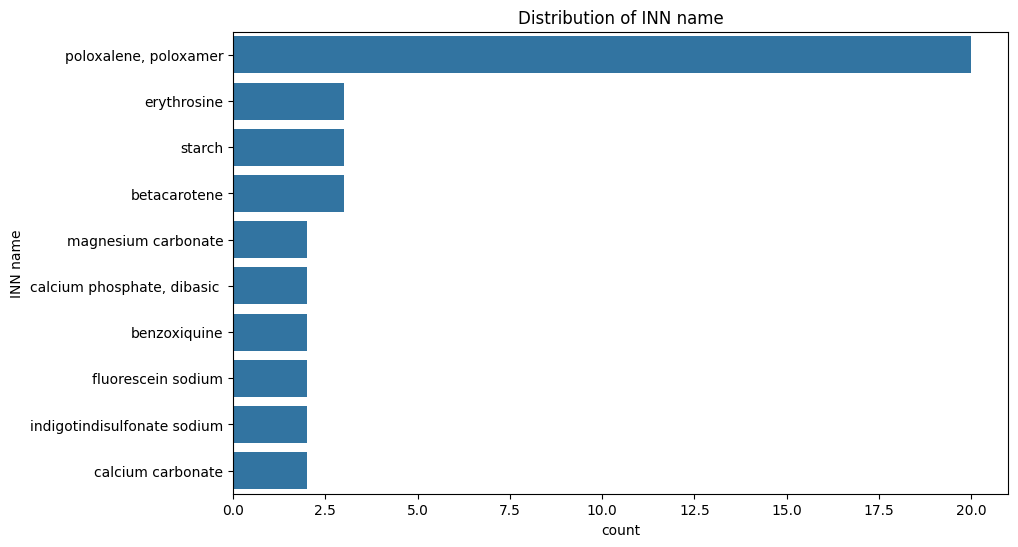

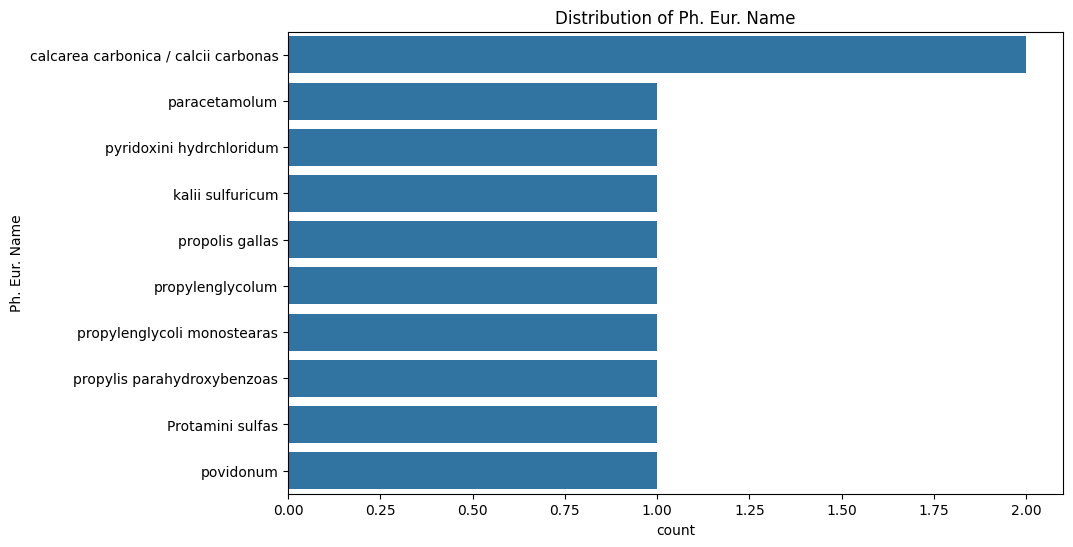

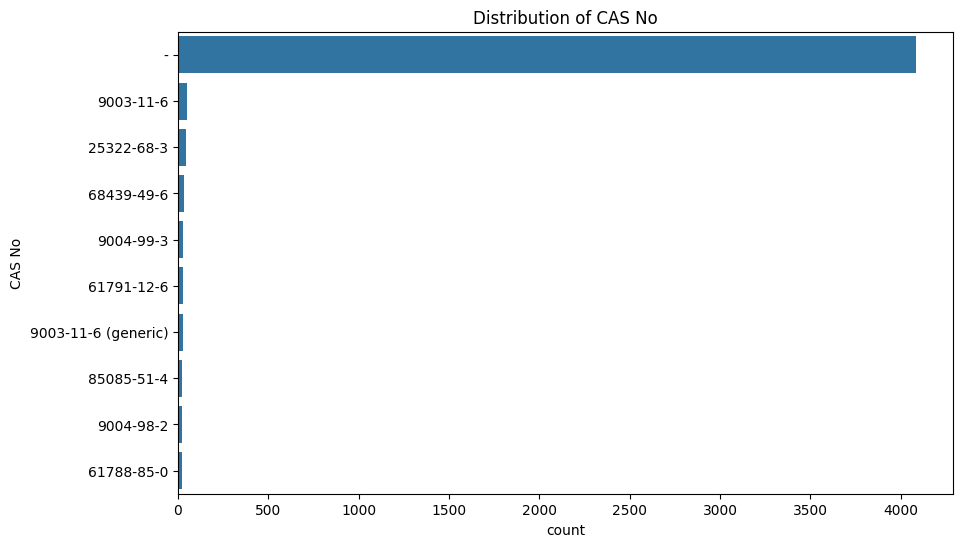

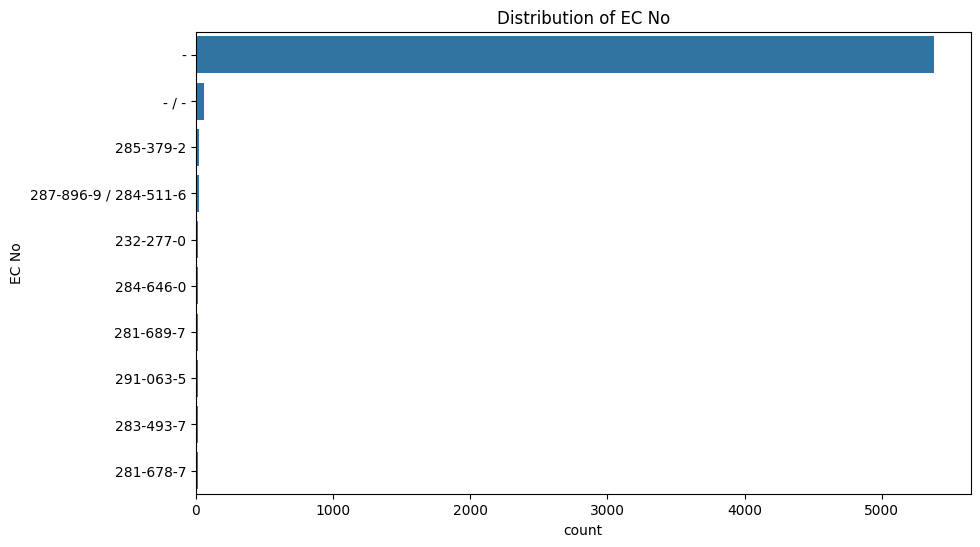

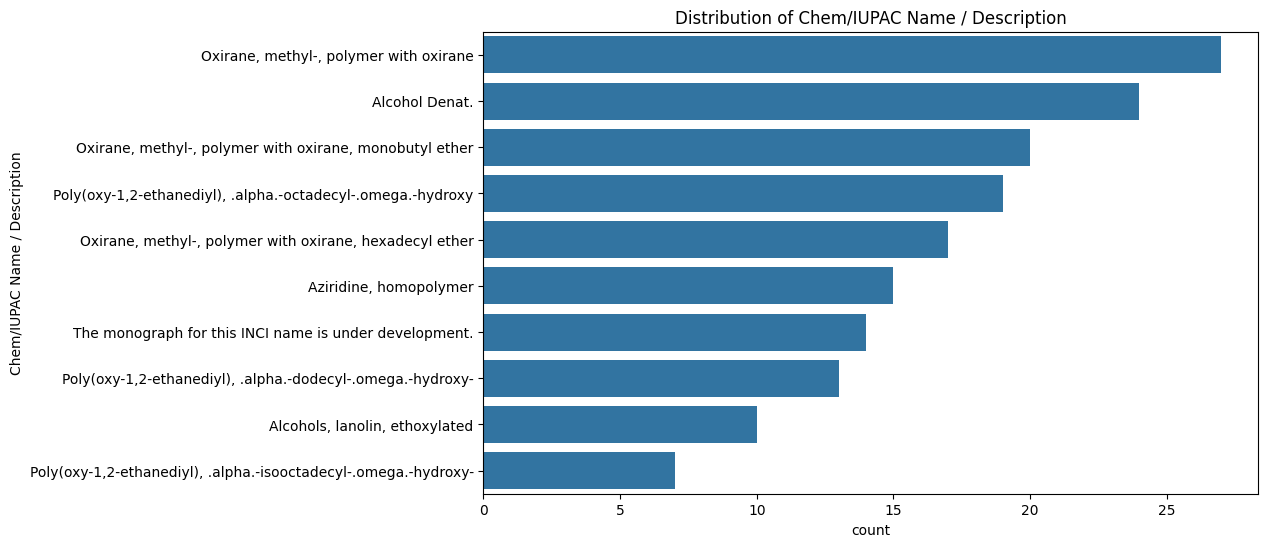

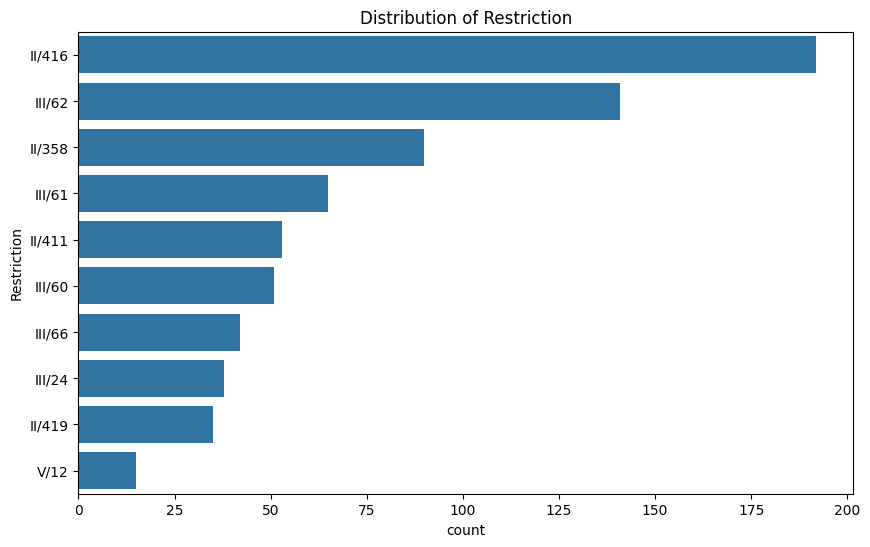

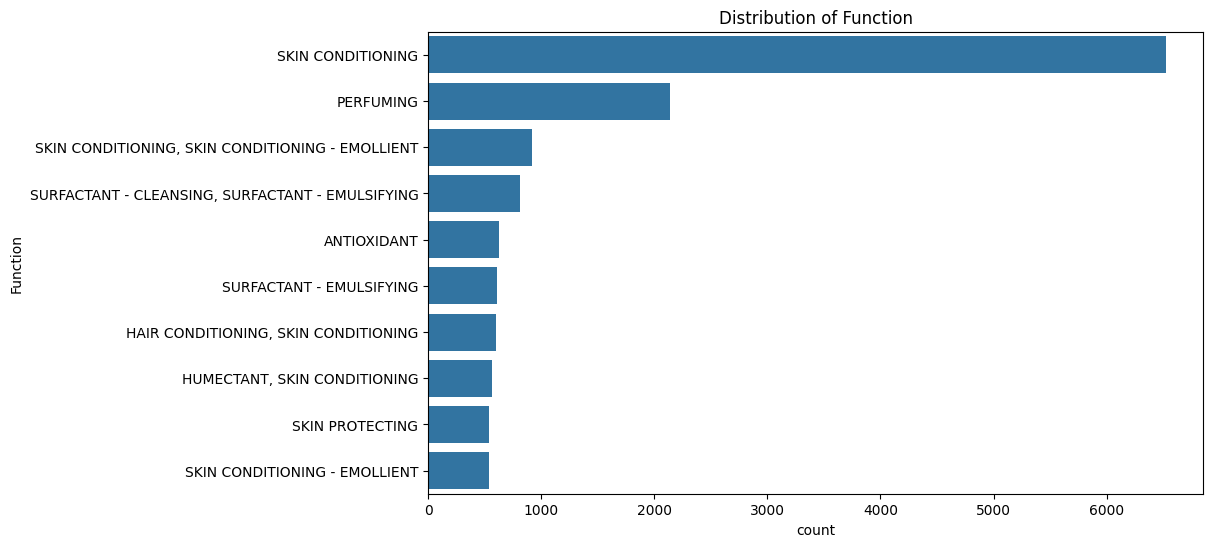

In [102]:
# Analyze the distribution of categorical variables, only top 10 for each
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data= df, order = df[col].value_counts().index[:10])
    plt.title(f'Distribution of {col}')
    plt.show()

From the plots:

* Most of the data was uploaded in 2010
* The majority of the products in the dataset are used for skin conditioning
* The most frequent restriction among the products is the II/416
* 2 chemicals stand out compared to others, these are Oxirane and Alcohol denat
* The INN name is frequently repeated  as "Poloxalen, poloxamer", making sense as this is a solvent that might be used to mix with other products. It is important to mention that this does not have any restriction.



In [103]:
# Display products that contain poloxalene
Poloxalene = df[df['INN name'] == 'poloxalene, poloxamer']
Poloxalene

,COSING Ref No,INCI name,INN name,Ph. Eur. Name,CAS No,EC No,Chem/IUPAC Name / Description,Restriction,Function,Update Date
20021,57097,PEG/PPG-10/2 COPOLYMER,"poloxalene, poloxamer",NaN,9003-11-6 (generic),NaN,"Oxirane, methyl-, polymer with oxirane",NaN,SURFACTANT - EMULSIFYING,2010-10-15
20029,57104,PEG/PPG-10/70 COPOLYMER,"poloxalene, poloxamer",NaN,9003-11-6 (generic),NaN,"Oxirane, methyl-, polymer with oxirane",NaN,SOLVENT,2010-10-15
20031,57106,PEG/PPG-116/66 COPOLYMER,"poloxalene, poloxamer",NaN,9003-11-6 (generic),NaN,"Oxirane, methyl, polymer with oxirane (116 mol...",NaN,SOLVENT,2010-10-15
20037,77201,PEG/PPG-125/30 COPOLYMER,"poloxalene, poloxamer",NaN,9003-11-6 (generic),NaN,"Oxirane, methyl-, polymer with oxirane",NaN,SOLVENT,2010-10-15
20052,57118,PEG/PPG-160/31 COPOLYMER,"poloxalene, poloxamer",NaN,9003-11-6 (generic),-,PEG/PPG-160/31 Copolymer is the block copolyme...,NaN,SOLVENT,2011-01-24
20055,77203,PEG/PPG-17/6 COPOLYMER,"poloxalene, poloxamer",NaN,9003-11-6 (generic),NaN,"Oxirane, methyl-, polymer with oxirane",NaN,SOLVENT,2010-10-15
20060,77204,PEG/PPG-18/4 COPOLYMER,"poloxalene, poloxamer",NaN,9003-11-6 (generic),NaN,"Oxirane, methyl-, polymer with oxirane",NaN,SOLVENT,2010-10-15
20079,57217,PEG/PPG-200/70 COPOLYMER,"poloxalene, poloxamer",NaN,9003-11-6 (generic),-,PEG/PPG-200/70 Copolymer is the block copolyme...,NaN,SOLVENT,2011-01-24
20087,57224,PEG/PPG-23/17 COPOLYMER,"poloxalene, poloxamer",NaN,9003-11-6 (generic),NaN,"Oxirane, methyl-, polymer with oxirane",NaN,SOLVENT,2010-10-15
20093,57228,PEG/PPG-240/60 COPOLYMER,"poloxalene, poloxamer",NaN,9003-11-6 (generic),NaN,"Oxirane, methyl-, polymer with oxirane",NaN,SOLVENT,2010-10-15


In [104]:
# Adding new column for restriction as boolean
df['Has_restriction'] = df['Restriction'].notna()

# Filter those products where there is a restriction
restricted_products = df[df['Has_restriction']== True]


In [105]:
# Display percentage of restriction among products

total_products = len(df)
total_restricted = len(df[df['Has_restriction'] == True])

percentage_restricted = total_restricted / total_products * 100

print(f'From total products in list, the percentage of products with restriction is {percentage_restricted:.2f}%')

From total products in list, the percentage of products with restriction is 6.48%


## Products functionality

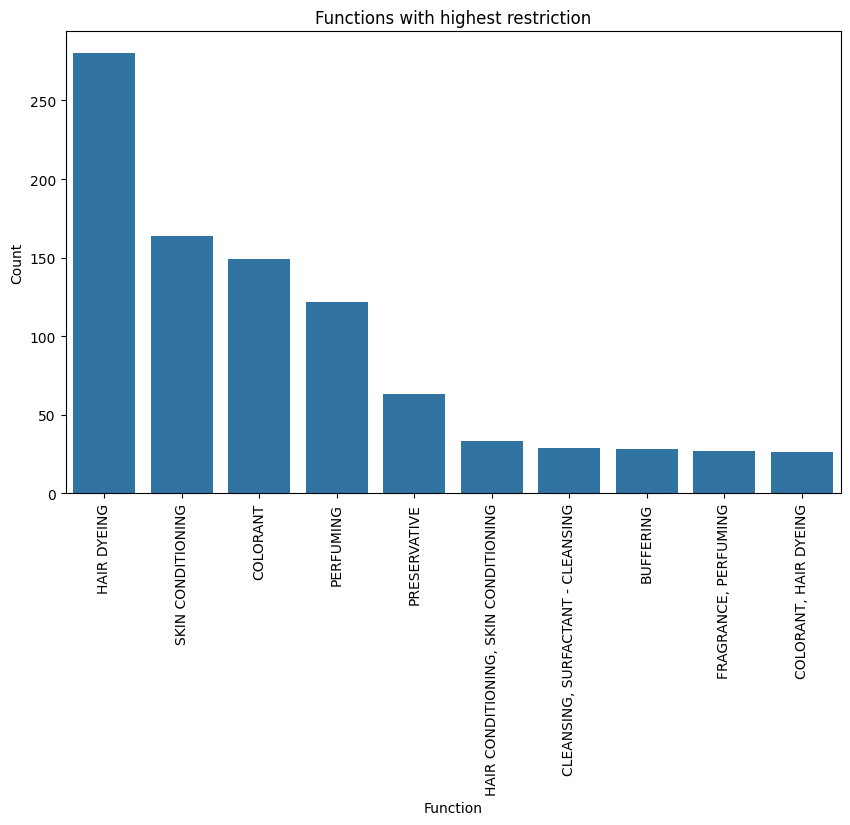

In [106]:
# Display functions with certain restriction
# Filter null values
restricted_products_function = restricted_products['Function']
restricted_products_function = restricted_products_function.dropna()
# Count the occurrences of each function and take top 10
restricted_products_function_top = restricted_products_function.value_counts().nlargest(10)

# Plot the results
plt.figure(figsize=(10,6))
sns.barplot( x=restricted_products_function_top.index, y=restricted_products_function_top.values)
plt.title('Functions with highest restriction')
plt.xlabel('Function')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


The products that are used for hair dyeing are the ones with highest restrictions

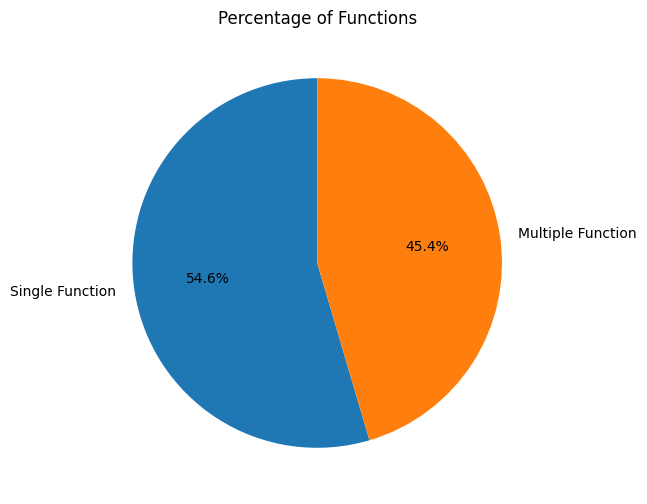

In [107]:
# Display products with one or multiple functions

# Avoiding null values from function column
df_function = df[df['Function'].notna()]
df_function

multiple_functions = df_function[df_function['Function'].str.contains(',')]

multiple_functions_products = len(multiple_functions)
single_functions_products = len(df_function) - multiple_functions_products

# Plot products functionality

plt.figure(figsize=(8, 6))
plt.pie([single_functions_products, multiple_functions_products], labels=['Single Function', 'Multiple Function'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Functions')
plt.show()

It can be seen that there are more chemicals with only one function rather than multiple, but this does not show where each can be used, so this does not means that a chemical with a single function is less or more valuable than one with multiple.

In [108]:
# Display distribution of multiple function products

multiple_functions_count = multiple_functions['Function'].value_counts()
multiple_functions_count.head(10)

Function
SKIN CONDITIONING, SKIN CONDITIONING - EMOLLIENT               919
SURFACTANT - CLEANSING, SURFACTANT - EMULSIFYING               810
HAIR CONDITIONING, SKIN CONDITIONING                           598
HUMECTANT, SKIN CONDITIONING                                   566
CLEANSING, SURFACTANT - CLEANSING                              273
SKIN CONDITIONING, SKIN PROTECTING                             261
ANTIOXIDANT, SKIN CONDITIONING                                 251
ANTISTATIC, HAIR CONDITIONING                                  239
CLEANSING, SURFACTANT - CLEANSING, SURFACTANT - EMULSIFYING    235
ANTIOXIDANT, SKIN PROTECTING                                   209
Name: count, dtype: int64

Some functions are repeated several times for the different chemicals such as hair conditioning or skin conditioning

In [109]:
# Split the functions into individual phrases for multiple functions products

all_phrases = []
for functions in multiple_functions['Function']:
  phrases = functions.split(', ')
  all_phrases.extend(phrases)

phrase_counts = collections.Counter(all_phrases)

# Convert the counter to a DataFrame for better readability
phrase_counts_df = pd.DataFrame.from_dict(phrase_counts, orient='index', columns=['Count'])
phrase_counts_df = phrase_counts_df.sort_values(by='Count', ascending=False)

# Display the counts
print(phrase_counts_df.head(10))  # Display top 10 phrases

                               Count
SKIN CONDITIONING               6539
HAIR CONDITIONING               2940
SURFACTANT - CLEANSING          2853
SKIN CONDITIONING - EMOLLIENT   2803
SURFACTANT - EMULSIFYING        2137
ANTIOXIDANT                     1931
SKIN PROTECTING                 1810
HUMECTANT                       1738
CLEANSING                       1346
VISCOSITY CONTROLLING           1144


Most of those products that have multiple functions, one of their functions is skin conditioning. It is also interesting to see that Surfactant (Cleasing) appears as one of the products with most functions in the list.

In [110]:
# Display count of products with single function

single_functions = df_function[df_function['Function'].str.contains(',') == False]
single_functions_count = single_functions['Function'].value_counts()
single_functions_count.head(10)

Function
SKIN CONDITIONING                6527
PERFUMING                        2142
ANTIOXIDANT                       627
SURFACTANT - EMULSIFYING          613
SKIN PROTECTING                   540
SKIN CONDITIONING - EMOLLIENT     538
FILM FORMING                      456
FRAGRANCE                         428
HAIR CONDITIONING                 388
HAIR DYEING                       385
Name: count, dtype: int64

For products with one function, same as for the one with multiple, they are mainly used for skin conditioning.
Nevertheless, perfumes and antioxidants are also at the top of the list.
So as mentioned before, the fact that they have only one function does not make them less valuable as they might be used in several products, like for example in anti aging products or to perfume them.

## Chem/IUPAC Name / Description

In [111]:
# Display different tipe of chemicals

# Filter null

df_chemicals = df['Chem/IUPAC Name / Description'].dropna()

# Split the chemical description into phrases

all_phrases = []

for chemical in df_chemicals:
  phrases = chemical.split(', ')
  all_phrases.extend(phrases)

# Count the occurrences of each unique phrase
phrase_counts = collections.Counter(all_phrases)

# Convert the counter to a DataFrame

phrase_counter_df = pd.DataFrame.from_dict(phrase_counts, orient='index', columns=['Count'])
phrase_counter_df = phrase_counter_df.sort_values(by='Count', ascending=False)

print(phrase_counter_df.head(10))

                                      Count
Poly(oxy-1,2-ethanediyl)                742
Rosaceae                                291
leucine                                 277
glycine                                 250
ethoxylated                             243
enzyme or other method of hydrolysis    219
lysine                                  217
Fatty acids                             187
Leguminosae                             182
isoleucine                              175


In [112]:
# Display those chemicals with restrictions

restricted_products = df[df['Has_restriction'] == True]

# Filter null values
df_chemicals = restricted_products['Chem/IUPAC Name / Description'].dropna()

# Split the chemical description into phrases

all_phrases = []

for chemical in df_chemicals:
  phrases = chemical.split(', ')
  all_phrases.extend(phrases)

# Count the occurrences of each unique phrase
phrase_counts = collections.Counter(all_phrases)

# Convert the counter to a DataFrame

phrase_counter_df = pd.DataFrame.from_dict(phrase_counts, orient='index', columns=['Count'])
phrase_counter_df = phrase_counter_df.sort_values(by='Count', ascending=False)

print(phrase_counter_df.head(10))

                     Count
Pinaceae                53
Rutaceae                34
Citrus limon (L.)       19
Phenol                  18
Rutaceae                15
Ethanol                 14
Rutaceae                14
Citrus aurantifolia     12
Amides                  12
Amines                  12


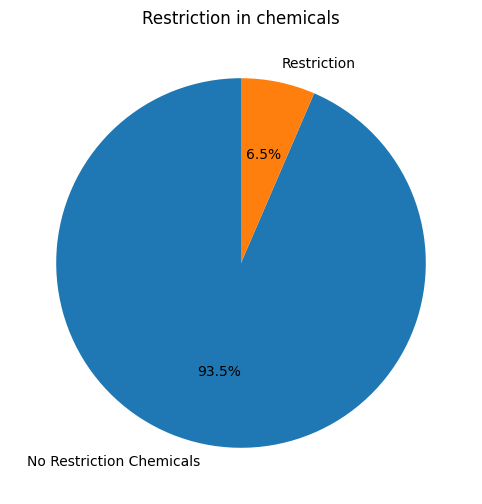

In [113]:
# Compare chemicals with restriction vs those without

restricted_products_count = len(restricted_products)
no_restriction_products_count = len(df) - restricted_products_count

# Plot compare

plt.figure(figsize = (8,6))
plt.pie([no_restriction_products_count, restricted_products_count], labels=['No Restriction Chemicals', 'Restriction'], autopct='%1.1f%%', startangle=90)
plt.title('Restriction in chemicals')
plt.show()

There are more chemicals without restictions.

In [114]:
# Filtering the Function column
df_function_notnull = df[df['Function'].notna()]

# Filter null
df_chemicals = df_function_notnull[df_function_notnull['Chem/IUPAC Name / Description'].notna()]

df_chemicals


,COSING Ref No,INCI name,INN name,Ph. Eur. Name,CAS No,EC No,Chem/IUPAC Name / Description,Restriction,Function,Update Date,Has_restriction
0,94753,DISODIUM TETRAMETHYLHEXADECENYLCYSTEINE FORMYL...,NaN,NaN,"2040469-40-5, 2422121-34-2",NaN,Disodium Tetramethylhexadecenylcysteine Formyl...,NaN,SKIN PROTECTING,2020-06-16,False
1,99268,(ANGELICA ACUTILOBA/PAEONIA LACTIFLORA) ROOT/C...,NaN,NaN,NaN,NaN,(Angelica Acutiloba/Paeonia Lactiflora) Root/C...,NaN,SKIN CONDITIONING - EMOLLIENT,2021-03-19,False
2,99270,(ARCTIUM LAPPA/RAPHANUS SATIVUS/MALVA VERTICIL...,NaN,NaN,NaN,NaN,(Arctium Lappa/Raphanus Sativus/Malva Verticil...,NaN,SKIN CONDITIONING - EMOLLIENT,2021-03-19,False
3,94896,(LIQUIDAMBAR STYRACIFLUA/TRIBULUS TERRESTRIS) ...,NaN,NaN,NaN,NaN,(Liquidambar Styraciflua/Tribulus Terrestris)...,NaN,SKIN CONDITIONING,2017-12-01,False
4,95645,ACRYLATES/VA/VINYL NEODECANOATE COPOLYMER,NaN,NaN,99728-55-9,NaN,Acrylates/VA/Vinyl Neodecanoate Copolymer is ...,NaN,PLASTICISER,2018-02-14,False
...,...,...,...,...,...,...,...,...,...,...,...
30065,86618,ZYGOSACCHAROMYCES MICROELLIPSOIDES FERMENT,NaN,NaN,-,-,Zygosaccharomyces Microellipsoides Ferment is ...,NaN,HUMECTANT,2010-10-15,False
30066,87420,ZYGOSACCHAROMYCES/APPLE FRUIT/PAPAYA FRUIT/PIN...,NaN,NaN,-,-,Zygosaccharomyces/Apple Fruit/Papaya Fruit/Pin...,NaN,SKIN CONDITIONING,2010-10-15,False
30067,60329,ZYMOMONAS FERMENT EXTRACT,NaN,NaN,NaN,NaN,Zymomonas Ferment Extract is an extract of the...,NaN,"HUMECTANT, SKIN CONDITIONING",2010-10-15,False
30068,60330,ZYMOMONAS FERMENT FILTRATE,NaN,NaN,NaN,NaN,Zymomonas Ferment Filtrate is a filtrate of th...,NaN,"HUMECTANT, SKIN CONDITIONING",2010-10-15,False


In [115]:
# Count the number of times each function appears for each 'Chem/IUPAC Name / Description'
function_counts = df_chemicals.groupby(['Chem/IUPAC Name / Description', 'Function']).size().reset_index(name='Count')

# Aggregate counts to get the total number of times each function is used
total_function_counts = function_counts.groupby('Function')['Count'].sum().reset_index()

# Sort by the total count to find the most frequently used functions
total_function_counts = total_function_counts.sort_values(by='Count', ascending=False)

# Display the top 10 most frequently used functions
print("\nTotal Function Counts:")
print(total_function_counts.head(10))  # Display top 10 for brevity



Total Function Counts:
                                              Function  Count
2319                                 SKIN CONDITIONING   6467
2257                                         PERFUMING   2141
2353  SKIN CONDITIONING, SKIN CONDITIONING - EMOLLIENT    905
2443  SURFACTANT - CLEANSING, SURFACTANT - EMULSIFYING    799
692                                        ANTIOXIDANT    611
2458                          SURFACTANT - EMULSIFYING    610
2033              HAIR CONDITIONING, SKIN CONDITIONING    580
2133                      HUMECTANT, SKIN CONDITIONING    561
2415                                   SKIN PROTECTING    527
2320                     SKIN CONDITIONING - EMOLLIENT    521


Most of the chemicals in the dataset are mainly used for skin conditioning and perfuming

In [116]:
# Display the diversity of functions by chemical

function_diversity = df_chemicals.groupby('Chem/IUPAC Name / Description')['Function'].nunique().reset_index(name='Unique Functions')
function_diversity = function_diversity.sort_values(by='Unique Functions', ascending=False)
print("Function Diversity per Chemical Description:")
print(function_diversity.head(10))


Function Diversity per Chemical Description:
                           Chem/IUPAC Name / Description  Unique Functions
4563                      Alcohols, lanolin, ethoxylated                 6
21353  Poly(oxy-1,2-ethanediyl), .alpha.-octadecyl-.o...                 5
21177  Poly(oxy-1,2-ethanediyl), .alpha.-dodecyl-.ome...                 4
19101  Oxirane, methyl-, polymer with oxirane, monobu...                 4
19030             Oxirane, methyl-, polymer with oxirane                 4
21393  Poly(oxy-1,2-ethanediyl), .alpha.-tridecyl-.om...                 3
19099  Oxirane, methyl-, polymer with oxirane, hexade...                 3
19098  Oxirane, methyl-, polymer with oxirane, ether ...                 3
24807  Siloxanes and silicones, di-Me, 3-hydroxypropy...                 3
0                                                     \n                 3


Among the chemicals in the dataset, the 'Alcohols, lanolin, ethoxylated' is the one with the largest range of application followed by the   Poly(oxy-1,2-ethanediyl) considering their functions

## Date Analysis

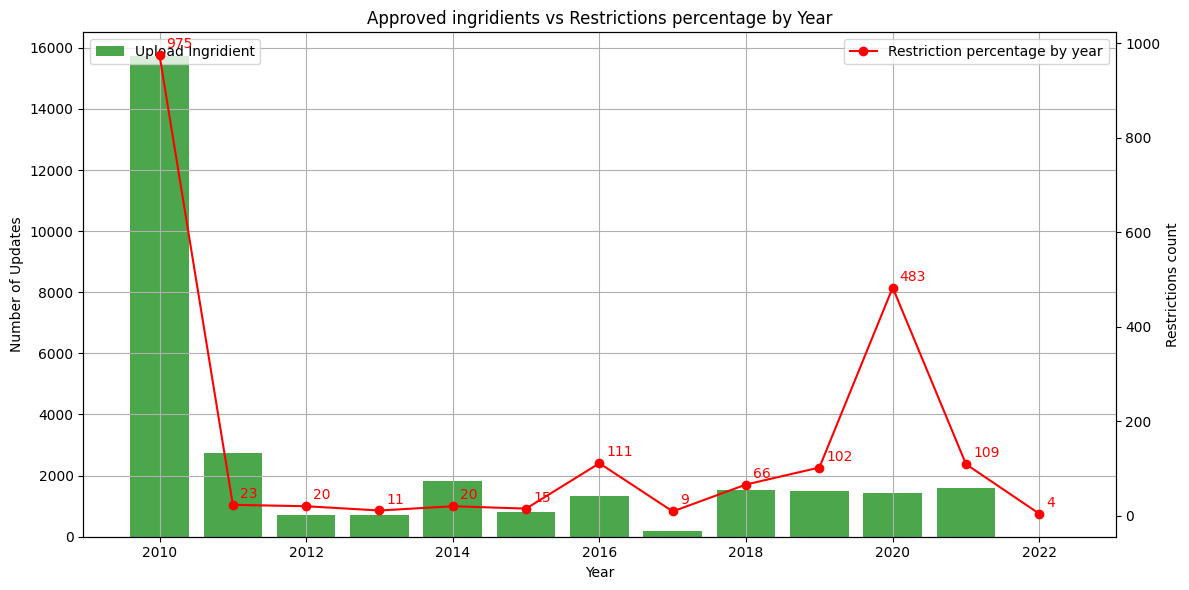

In [141]:
# Display the number of approved ingredients vs restriction throughout the years

# Calculate update counts by year
ingridients_by_year = df['Update Year'].value_counts().sort_index()

# Calculate the number of restrictions per year
restrictions_by_year = df[df['Has_restriction'] == True]['Update Year'].value_counts().sort_index()

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting update frequency by year (bar plot)
ax1.bar(ingridients_by_year.index, ingridients_by_year.values, color='g', alpha=0.7, label='Upload Ingridient')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Updates')
ax1.tick_params(axis='y')
ax1.grid(True)

# Creating a secondary y-axis for percentage of True values
ax2 = ax1.twinx()
ax2.plot(restrictions_by_year.index, restrictions_by_year.values, color='r', marker='o', label='Restriction percentage by year')
ax2.set_ylabel('Restrictions count')
ax2.tick_params(axis='y')

# Adding percentages as annotations
for year, count in zip(restrictions_by_year.index, restrictions_by_year.values):
    ax2.annotate(f'{count}', xy=(year, count), xytext=(5, 5), textcoords='offset points', color='r')

# Adding titles and legends
ax1.set_title('Approved ingridients vs Restrictions percentage by Year')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Most ingriedients were uploded in 2010.
2022 was the last upload.
It is possible to see from 2015 there is an increase in the restirction of the ingridients.

# Conclusion

TL;DR:


* There are 30070 records in the dataset
* The primary function for most of the products in the dataset is skin conditioning.
* Most of the ingredients in the dataset were uploaded in 2010, with the last update in 2022. Since 2015, there has been an increase in the number of restrictions.
* 'Alcohols, lanolin, ethoxylated' is the chemical with the largest range of applications.
* 93.5% of the chemicals don't have any restrictions.
* 54.6% of the products in the dataset have only one function.
* Of the total products in the list, the percentage with restrictions is 6.48%.



This is a large dataset with 30,070 records. There are 10 columns, some of them like 'INN name' and 'Ph. Eur. Name' contain many null values, making them not useful for analysis.

Regarding the 'Restriction' column, several null values were treated as if the ingredient does not have any restrictions.

Additionally, for the function column, the percentage of unique values is low, indicating that many ingredients are used for the same purposes. These functions include:

* SKIN CONDITIONING
* HAIR CONDITIONING
* PERFUMING
* ANTIOXIDANT

The most frequent restriction among the products is II/416. Only 6.48% of the ingredients in the list present any kind of restriction.

Two chemicals stand out compared to others: Oxirane and Alcohol denat.

Most of the values in the dataset were uploaded in 2010. From 2015 onwards, there has been an increase in the number of restrictions, possibly due to EU cosmetics regulations.

The products with the most restrictions are from the Pinaceae and Rutaceae families.




